In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

# Regression problem in neural network

### Creating data to view and look

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Features
X = np.array([-10.0, -5.0, -3.0, -1.0, 1., 2., 5., 6.])
# labels
y = np.array([3., 8., 10., 12., 14., 15., 18., 19.])
X, y

(array([-10.,  -5.,  -3.,  -1.,   1.,   2.,   5.,   6.]),
 array([ 3.,  8., 10., 12., 14., 15., 18., 19.]))

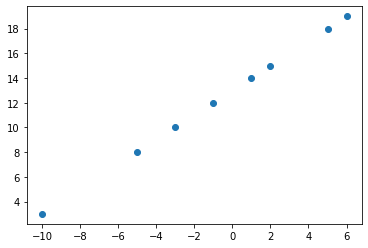

In [4]:
# y = X + 13
plt.scatter(X, y)

### Input and output shape

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
# Turn numpy arrays to tensors
X = tf.constant(tf.cast(X, tf.float32))
y = tf.constant(tf.cast(y, tf.float32))
X.shape, y.shape, X.dtype, y.dtype

(TensorShape([8]), TensorShape([8]), tf.float32, tf.float32)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim, y[0].ndim

(TensorShape([]), TensorShape([]), 0, 0)

### Steps in modelling with Tensorflow
1. **Creating a model** -> input layer, hidden layer, output layer
2. **Compile the model** -> loss function, optimizer, evaluation metrics
3. **Fit the model** -> (patterns between X and y)
4. **Evaluate the model**

In [9]:
# # Optionally, the first layer can receive an `input_shape` argument:
# Method1
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(1))
#model.summary()

# Method2
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

model.summary()

# Method3
# model = tf.keras.Sequential(
#     tf.keras.layers.Dense(1)
# )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
tf.random.set_seed(42)

### Creating layers 

using `tf.keras.Sequential()`
Can be done in 2 ways
* using `.add()` method
* using a list when instantiating

Input layer can be specified in 2 ways
* using `tf.keras.Input(shape=<>)`
* In the first layer specify `input_shape = ()`

In [11]:
# Method 1 -> Add layers using a list
# model = tf.keras.Sequential(
#     [tf.keras.layers.Dense(1, input_shape=(1,))]
# )
# model.build()
# model.summary()

# Method 2 -> Add layers using .add() method
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
# model.summary()

# Method 3 -> Specify Input Layer separately
# model = tf.keras.Sequential(
#     [
#         tf.keras.Input(shape=(1,)),
#         tf.keras.layers.Dense(1)
#     ]
# )
# model.summary()

# Method 4 -> Specify input shape in the first layer, add layers using List
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(1, input_shape=(1,))
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.mse]
)

In [13]:
model.fit(X, y, epochs=100, verbose=False)

In [14]:
X_test = tf.constant([10., 11., 13., 18.])
y_test = tf.constant([23., 24., 26., 31.])
y_pred = model.predict(X_test)
y_pred, type(y_pred)

(array([[20.756325],
        [21.710184],
        [23.6179  ],
        [28.387194]], dtype=float32), numpy.ndarray)

### Improving the model
1. Using create a model step -- add more layer, increase neurons, change activation functions
2. While compiling the model -- change optimization function, learning rate
3. Fitting the model - more epochs or on more data

### Improving model using adding more layers

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
    ]
)
model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.mse])
model.fit(X, y, epochs=500, verbose=False)

In [16]:
model.predict(X_test)

array([[12.440865 ],
       [13.2304945],
       [14.809753 ],
       [18.7579   ]], dtype=float32)

In [17]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(1)
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.mse])
model.fit(X, y, epochs=500, verbose=False)

In [19]:
model.predict(X_test)

array([[22.999937],
       [23.999937],
       [25.999935],
       [30.999931]], dtype=float32)

### Evaluating Model

**Visualize**
1. The data
2. The model
3. Training
4. Predictions v/s ground truth

In [20]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.8.2


In [21]:
X = tf.range(-100, 100, 4)
y = X + 10

X.shape, y.shape, X, y

(TensorShape([50]),
 TensorShape([50]),
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [22]:
X_train = X[:40]
y_train = y[:40]
X_val = X[40:45]
y_val = y[40:45]
X_test = X[45:]
y_test = y[45:]

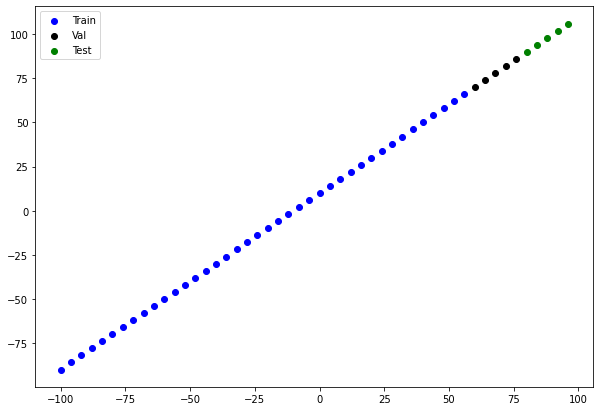

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_val, y_val, c='k', label='Val')
plt.scatter(X_test, y_test, c='g', label="Test")
plt.legend()
plt.show();

### Visialize Model - NN architecture

In [24]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name="finallayer")
    ],
    name = "NNRegressionModel"
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = [tf.keras.metrics.mae]
)

model.summary()

model.fit(X_train, y_train, epochs=5, verbose=2)

Model: "NNRegressionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 finallayer (Dense)          (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
2/2 - 0s - loss: 29.2519 - mean_absolute_error: 29.2519 - 408ms/epoch - 204ms/step
Epoch 2/5
2/2 - 0s - loss: 22.4591 - mean_absolute_error: 22.4591 - 8ms/epoch - 4ms/step
Epoch 3/5
2/2 - 0s - loss: 15.9595 - mean_absolute_error: 15.9595 - 8ms/epoch - 4ms/step
Epoch 4/5
2/2 - 0s - loss: 9.9773 - mean_absolute_error: 9.9773 - 12ms/epoch - 6ms/step
Epoch 5/5
2/2 - 0s - loss: 8.3039 - mean_absolute_error: 8.3039 - 10ms/epoch - 5ms/step


In [35]:
tf.keras.utils.plot_model(model = model, show_shapes=True, show_layer_names=True)

NameError: ignored

### Visualize Model's prediction

In [26]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = [tf.keras.metrics.mae]
)
model.fit(X_train, y_train, epochs=500, verbose=False)

In [27]:
y_pred = model.predict(X_val)
y_pred, y_val

(array([[-7.5315266],
        [-8.029822 ],
        [-8.528117 ],
        [-9.026413 ],
        [-9.524708 ]], dtype=float32),
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([70, 74, 78, 82, 86], dtype=int32)>)

### Plot to visualize y_pred and y_val

In [28]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_val,
                     test_labels = y_val,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label="Train Data")
  plt.scatter(test_data, test_labels, c='g', label="Test Data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend()
  plt.show();

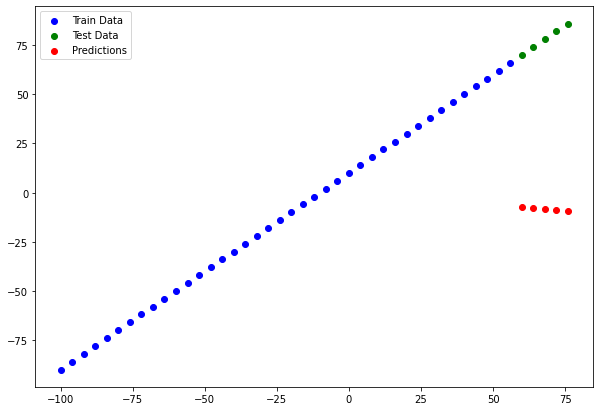

In [29]:
plot_predictions()

### Evaluate the model with regression evaluation metrics
* MSE
* MAE
* Huber Loss

In [30]:
model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 141ms/step - loss: 86.5281 - mean_absolute_error: 86.5281


[86.52811431884766, 86.52811431884766]

In [31]:
np.sum(np.abs(y_val.numpy() - y_pred)) / y_pred.shape[0]

432.64058685302734

In [32]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(y_pred, y_val).numpy()

86

In [33]:
m = tf.metrics.mean_absolute_error(y_true=tf.cast(y_val, dtype=tf.float32), y_pred=tf.squeeze(tf.constant(y_pred)))
m

<tf.Tensor: shape=(), dtype=float32, numpy=86.528114>

In [34]:
tf.cast(y_val[...,tf.newaxis], dtype=tf.float32)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[70.],
       [74.],
       [78.],
       [82.],
       [86.]], dtype=float32)>

In [35]:
tf.constant(y_pred)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-7.5315266],
       [-8.029822 ],
       [-8.528117 ],
       [-9.026413 ],
       [-9.524708 ]], dtype=float32)>

**Mean square error**

In [36]:
tf.metrics.mean_squared_error(y_true=y_val, y_pred=tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=7527.5845>

In [41]:
# Function to get MSE and MAE
def mae_and_mse(y_true, y_pred):
  mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(tf.constant(y_pred))).numpy()
  mae = tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(tf.constant(y_pred))).numpy()
  return {
      "mae": mae,
      "mse": mse
  }

### Running experiments to improve our model

Keep learning rate = 0.01 and optimizer = Adam()

1. One layer, 100 epochs
2. One layer, 500 epochs
3. Two layers, 100 epochs
4. Two layers, 500 epochs

In [42]:
# Experiment 1
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.mae]
)
model.fit(X_train, y_train, epochs=100, verbose=False)

In [43]:
y_pred = model.predict(X_val)
tf.squeeze(y_pred), y_val

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([51.75653 , 55.251278, 58.746025, 62.240772, 65.73552 ],
       dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([70, 74, 78, 82, 86], dtype=int32)>)

In [47]:
results1 = mae_and_mse(y_val, y_pred)
results1

{'mae': 19.253975, 'mse': 371.22614}

In [49]:
# Experiment 2
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = [tf.keras.metrics.mae]
)

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 95.9093 - mean_absolute_error: 95.9093
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 95.0321 - mean_absolute_error: 95.0321
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 94.1851 - mean_absolute_error: 94.1851
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 93.3242 - mean_absolute_error: 93.3242
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 92.4791 - mean_absolute_error: 92.4791
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 91.6263 - mean_absolute_error: 91.6263
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 90.7662 - mean_absolute_error: 90.7662
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 89.8735 - mean_absolute_error: 89.8735
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 89.0451 - mean_absolute_error: 89.0451
Epoch

In [50]:
y_pred = model.predict(X_val)
tf.squeeze(y_pred), y_val

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([67.4268  , 71.34851 , 75.27022 , 79.191925, 83.11363 ],
       dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([70, 74, 78, 82, 86], dtype=int32)>)

In [51]:
results2 = mae_and_mse(y_val, y_pred)
results2

{'mae': 2.729782, 'mse': 7.463969}

In [53]:
# Experiment 3
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = [tf.keras.metrics.mae]
)
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 17.5926 - mean_absolute_error: 17.5926
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8854 - mean_absolute_error: 10.8854
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 7.7389 - mean_absolute_error: 7.7389
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1839 - mean_absolute_error: 9.1839
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3132 - mean_absolute_error: 9.3132
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5798 - mean_absolute_error: 8.5798
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4583 - mean_absolute_error: 7.4583
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.8940 - mean_absolute_error: 7.8940
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 7.8249 - mean_absolute_error: 7.8249
Epoch 10/100
2/2 [=

In [54]:
y_pred = model.predict(X_val)
tf.squeeze(y_pred).numpy(), y_val

(array([71.159706, 75.23675 , 79.31378 , 83.39082 , 87.46786 ],
       dtype=float32),
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([70, 74, 78, 82, 86], dtype=int32)>)

In [55]:
results3 = mae_and_mse(y_val, y_pred)
results3

{'mae': 1.3137833, 'mse': 1.7378962}

In [56]:
# Experiment 4
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = [tf.keras.metrics.mae]
)
model.fit(X_train, y_train, epochs=500, verbose=False)

In [57]:
y_pred = model.predict(X_val)
tf.squeeze(y_pred).numpy(), y_val

(array([70.12025 , 74.12544 , 78.130646, 82.13585 , 86.14106 ],
       dtype=float32),
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([70, 74, 78, 82, 86], dtype=int32)>)

In [58]:
results4 = mae_and_mse(y_val, y_pred)
results4

{'mae': 0.1306488, 'mse': 0.017123258}

In [61]:
all_results = [
    ['model1', results1['mae'], results1['mse']],
    ['model2', results2['mae'], results2['mse']],
    ['model3', results3['mae'], results3['mse']],
    ['model4', results4['mae'], results4['mse']]
]
import pandas as pd
results_df = pd.DataFrame(all_results, columns = ['model_name', 'mae', 'mse'])
results_df

,model_name,mae,mse
0,model1,19.253975,371.226135
1,model2,2.729782,7.463969
2,model3,1.313783,1.737896
3,model4,0.130649,0.017123


### Saving a model
1. Save the entire model (SavedModel format)
2. Save the entire model in HDF5 format

In [74]:
# Since model4 was our best model, lets save it
model.save('best_model_so_far')

INFO:tensorflow:Assets written to: best_model_so_far/assets


INFO:tensorflow:Assets written to: best_model_so_far/assets


In [75]:
!ls

best_model_so_far  model.png  sample_data


In [76]:
model_new = tf.keras.models.load_model('best_model_so_far')
model_new.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [77]:
y_pred_test = model_new.predict(X_test)
tf.squeeze(y_pred_test).numpy(), y_test

(array([ 90.146255,  94.15147 ,  98.15668 , 102.16187 , 106.16707 ],
       dtype=float32),
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 90,  94,  98, 102, 106], dtype=int32)>)

### Saving the model in HDF5 format

In [78]:
model.save('best_model_so_far_hdf5_format.h5')

In [79]:
!ls

best_model_so_far  best_model_so_far_hdf5_format.h5  model.png	sample_data


### Downloading files from google colab

*   Go to file click download
*   Using code - see below
*   Save the file to Google Drive



In [82]:
from google.colab import files
files.download('best_model_so_far')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# Save a model to Google Drive! -> Need to mount Google Drive first. Then the file can be copies 
# using 'cp' command
!cp -r '/content/best_model_so_far' '/content/drive/MyDrive/Colab Notebooks/'

## A larger Dataset
Predict insurance cost given some attributes - using NN Regression m

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# One-hot encode the categorical columns
insurance_one_hot = pd.get_dummies(insurance, columns = ['sex', 'smoker', 'region'])
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [16]:
target_column = 'charges'
X = insurance_one_hot[[col for col in insurance_one_hot.columns if col != target_column]]
y = insurance_one_hot[[target_column]]

In [18]:
X.columns, y.columns

(Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
        'smoker_yes', 'region_northeast', 'region_northwest',
        'region_southeast', 'region_southwest'],
       dtype='object'), Index(['charges'], dtype='object'))

In [19]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [21]:
rows = X.shape[0]
int(rows*0.8)

1070

In [58]:
# rows = X.shape[0]
# X_train, X_val, X_test = X[:int(rows*0.8)], X[int(rows*0.8):int(rows*0.9)], X[int(rows*0.9):]
# y_train, y_val, y_test = y[:int(rows*0.8)], y[int(rows*0.8):int(rows*0.9)], y[int(rows*0.9):]
# print(rows)
# print(X_train.shape, X_val.shape, X_test.shape)
# print(y_train.shape, y_val.shape, y_test.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, X_train.shape, y_train.shape

((1338, 11), (1070, 11), (1070, 1))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 OutputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


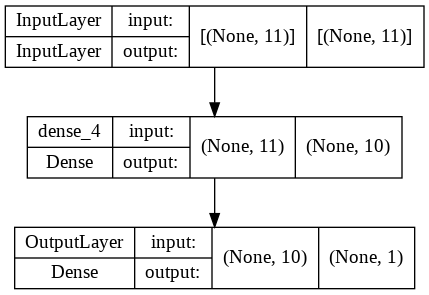

In [56]:
model1 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(11,), name="InputLayer"),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1, name = "OutputLayer")
    ]
)
model1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.mae]
)
model1.summary()

tf.keras.utils.plot_model(model=model1, show_shapes=True, show_layer_names=True)

In [59]:
model1.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13302.3662 - mean_absolute_error: 13302.3662
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13037.9150 - mean_absolute_error: 13037.9150
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12426.0928 - mean_absolute_error: 12426.0928
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 11373.6846 - mean_absolute_error: 11373.6846
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10034.2803 - mean_absolute_error: 10034.2803
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 8769.4541 - mean_absolute_error: 8769.4541
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7888.0562 - mean_absolute_error: 7888.0562
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7547.2944 - mean_absolute_error: 7547.2944
Epoch 9/500
34/34 [==============================] - 0s 2ms/st

In [60]:
y_pred = model1.predict(X_test)
tf.squeeze(y_pred[:10]), y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 9263.671 ,  5999.741 , 44427.867 ,  9158.245 , 32348.215 ,
         5689.6836,  1130.3954, 13326.9795,  3573.177 , 10100.435 ],
       dtype=float32)>,           charges
 764    9095.06825
 887    5272.17580
 890   29330.98315
 1293   9301.89355
 259   33750.29180
 1312   4536.25900
 899    2117.33885
 752   14210.53595
 1286   3732.62510
 707   10264.44210)

In [62]:
results1 = model1.evaluate(X_test, y_test)[1]
print("MAE of the model: ", results1)

9/9 [==============================] - 0s 3ms/step - loss: 3161.8086 - mean_absolute_error: 3161.8086
MAE of the model:  3161.80859375


In [64]:
y_train.mean(), y_train.median()

(charges    13346.089736
 dtype: float64, charges    9575.4421
 dtype: float64)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1stHiddenLayer (Dense)      (None, 100)               1200      
                                                                 
 SecondHiddenLayer (Dense)   (None, 10)                1010      
                                                                 
 OutputLayers (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


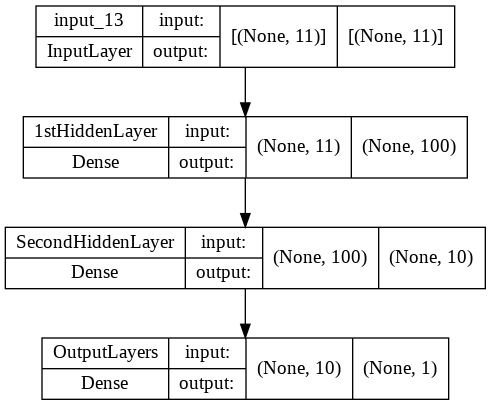

In [88]:
# Experiment 2 -  Add one more layer
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(11,)),
        tf.keras.layers.Dense(100, name="1stHiddenLayer"),
        tf.keras.layers.Dense(10, name="SecondHiddenLayer"),
        tf.keras.layers.Dense(1, name="OutputLayers")
    ]
)
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.mae]
)
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [84]:
history = model2.fit(X_train, y_train, epochs=200)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13310.1064 - mean_absolute_error: 13310.1064
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13174.4277 - mean_absolute_error: 13174.4277
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12876.4131 - mean_absolute_error: 12876.4131
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12268.5234 - mean_absolute_error: 12268.5234
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11204.9199 - mean_absolute_error: 11204.9199
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9767.3789 - mean_absolute_error: 9767.3789
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8371.2881 - mean_absolute_error: 8371.2881
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7579.1250 - mean_absolute_error: 7579.1250
Epoch 9/100
34/34 [==============================] - 0s 7ms/st

In [85]:
results2 = model2.evaluate(X_test, y_test)[1]
print("MAE of the model: ", results2)

9/9 [==============================] - 0s 2ms/step - loss: 5141.8125 - mean_absolute_error: 5141.8125
MAE of the model:  5141.8125


### Plot learning curve


In [86]:
# For this we use the history object from training 
## These are parameters in the histpory object
history.params

{'epochs': 100, 'steps': 34, 'verbose': 1}

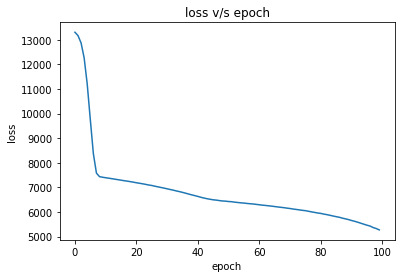

In [87]:
# history.history -> Contains loss
train_loss = history.history['loss']
mae = history.history['mean_absolute_error']
plt.plot(train_loss)
plt.title("loss v/s epoch")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

### Early stopping callback

We can see above that the training loss is decreasing, but how long should we train ?
We can use Tensorflow [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) to specify if the train loss is not imporoving then stop training 

In [92]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(11,)),
        tf.keras.layers.Dense(100, name="1stHiddenLayer"),
        tf.keras.layers.Dense(10, name="SecondHiddenLayer"),
        tf.keras.layers.Dense(1, name="OutputLayers")
    ]
)
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.mae]
)
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

## Use the call back here
history = model2.fit(X_train, y_train, epochs=500, callbacks=[callback], verbose=False)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1stHiddenLayer (Dense)      (None, 100)               1200      
                                                                 
 SecondHiddenLayer (Dense)   (None, 10)                1010      
                                                                 
 OutputLayers (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


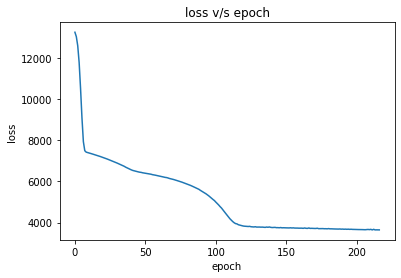

In [93]:
train_loss = history.history['loss']
mae = history.history['mean_absolute_error']
plt.plot(train_loss)
plt.title("loss v/s epoch")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

In [95]:
len(history.history['loss'])

217

In [96]:
results3 = model2.evaluate(X_test, y_test)[1]
print("MAE of the model: ", results3)

9/9 [==============================] - 0s 3ms/step - loss: 3439.1575 - mean_absolute_error: 3439.1575
MAE of the model:  3439.157470703125


### Preprocess Data - Normalization and Standardization

Normalization -> brings the numerical columns between 0 and 1
Standardization -> (X - mean) / std -> It convert the column to a normal looking distribution so it removes the effect of outliers -> We generally use normalization

From `sklearn.preprocessing` -> `MinMaxScaler` -> Normalization
From `sklearn.preprocessing` -> `StandardScaler` -> Standardization

We can also use `OneHotEncoder` from `sklearn.preprocessing`

And to use both of these transformations we can create a column Transformer
from `sklearn.compose.make_column_transfomer`


In [101]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [98]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

X = insurance.drop(['charges'], axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ct.fit(X_train)
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.fit_transform(X_test)

In [111]:
X_train.iloc[0]

age                26
sex            female
bmi             29.48
children            1
smoker             no
region      southeast
Name: 871, dtype: object

In [114]:
X_train_normal.shape

(1070, 11)

In [116]:
X_train_normal[0]
## This is converted in the order, we provided it in the make_column_transofmer
## First 3 are minmax scaled values of age, sex, bmi

array([0.17391304, 0.36373419, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [117]:
insurance_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(11,)),
        tf.keras.layers.Dense(100, name = "FirstHiddenLayer"),
        tf.keras.layers.Dense(10, name = "SecondHiddenLayer"),
        tf.keras.layers.Dense(1, name = "OutputLayer")
    ]
)
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.mae]
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = insurance_model.fit(X_train_normal, y_train, callbacks=[callback], epochs=500, verbose=False)

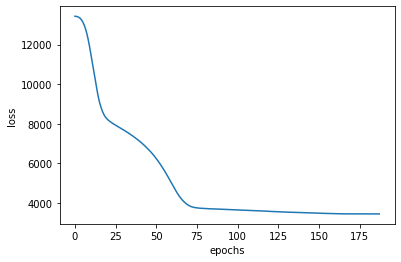

In [118]:
loss_values = history.history['loss']
plt.plot(loss_values)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot();

In [119]:
results4 = insurance_model.evaluate(X_test_normal, y_test)
results4

9/9 [==============================] - 0s 3ms/step - loss: 3231.2717 - mean_absolute_error: 3231.2717


### Trying MSE as a loss

In [121]:
insurance_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(11,)),
        tf.keras.layers.Dense(100, name = "FirstHiddenLayer"),
        tf.keras.layers.Dense(10, name = "SecondHiddenLayer"),
        tf.keras.layers.Dense(1, name = "OutputLayer")
    ]
)
insurance_model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.mae, tf.keras.metrics.mse]
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = insurance_model.fit(X_train_normal, y_train, callbacks=[callback], epochs=500, verbose=False)

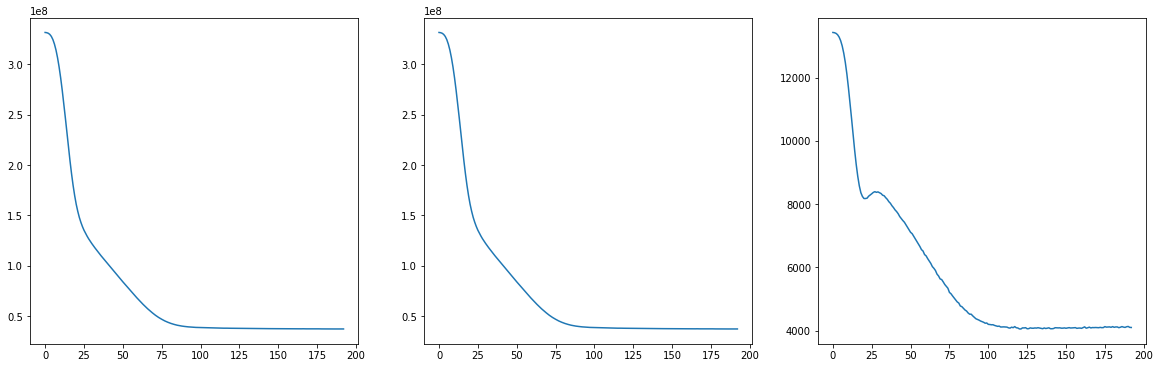

In [131]:
loss_values = history.history['loss']
mses = history.history['mean_squared_error']
maes = history.history['mean_absolute_error']

fig, axs = plt.subplots(1, 3, figsize=(20,6))

axs[0].plot(loss_values, label='loss')
axs[1].plot(mses, label='mse')
axs[2].plot(maes, label='mae')

plt.show();

In [124]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error'])